# Clustering of similar stocks
Clustering on a particular Nifty Index is performed on the basis of price movements for a given duration

Installing some libraries that aren't available by default

In [33]:
!pip install twitter yfinance nsepy

Importing Libraries

In [0]:
import pandas as pd
import numpy as np
import twitter
import csv 
import matplotlib.pyplot as plt
from nsepy import get_history
from datetime import date
import yfinance as yf
import seaborn as sns
from pandas_datareader import data as pdr
yf.pdr_override()
import scipy.stats
import sklearn
import plotly.express as px
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import squareform
from collections import Counter 


We can choose out of multiple NSE indices 
1.  nifty50
2.  nifty100
3.  nifty200
4.  nifty500
5.  niftyall
6.  niftybank
7.  niftyit
8.  niftypsubank
9.  niftyfmcg
10. niftyprivatebank
11. niftymetal
12. niftypharma
13. niftyfinance








Defining startdate, enddate, category and duration



In [0]:
category="nifty50"
start_date = '2020-01-01'
end_date='2020-01-30'
duration = "2020-2020"

Function for generating a ticker list as used by YFinance

In [0]:
def generate_symbols_list(symbol_category):
    df = pd.read_csv('nse-indices-symbols.csv')
    ls = df[symbol_category]
    lsf=[]
    for i in range(0,len(ls)) : 
        if pd.isnull(ls[i])!=True :
            lsf.append(ls[i])
    return lsf

Function for generating dataset using ticker list

In [0]:
def get_dataset(symbols, start_date, end_date):
    df=pd.DataFrame()
    for i in range(0,len(symbols)):
        symbol=symbols[i]
        data = pdr.get_data_yahoo(symbol, start=start_date, end=end_date)
        df[symbol]=data['Adj Close']
        fileName = symbol+start_date+"to"+end_date+".csv"
        #data.to_csv(fileName)
    return df

Function for generating a correlation

In [0]:
def get_corelation(df):
    corr_df = df.corr(method="pearson")
    return corr_df

Funtion to plot heatmap for corelation matrix

In [0]:
def plot_heatmap(df):
    fig = plt.figure(figsize=(30,16))
    ax1 = fig.add_subplot(111)
    plt.imshow(df, cmap='bone', interpolation='nearest')
    plt.colorbar()
    labels = df.columns.tolist()
    ax1.set_xticks(np.arange(len(labels)))
    ax1.set_yticks(np.arange(len(labels)))
    ax1.set_xticklabels(labels,rotation=90, fontsize=10)
    ax1.set_yticklabels(labels,fontsize=10)
    plt.show()


Function to cluster similar stocks based on corelation matrix

In [0]:
def cluster_corelation_matrix(corr,symbols) :
    dissimilarity = 1 - np.abs(corr)
    hierarchy = linkage(squareform(dissimilarity), method='average')
    labels = fcluster(hierarchy, 0.5, criterion='distance')
    dfn=pd.DataFrame(columns = ['Company Symbol'])
    dfn['Company Symbol']=symbols
    dfn['Cluster']=labels
    #dfn.sort_values(by=['Cluster'], inplace=True)
    return dfn

Function for Creating a list of cluster groups

In [0]:
def create_groups(dfn) : 
    number_of_clusters = len(Counter(dfn['Cluster']).keys())
    df = dfn.values
    groups = []
    for i in range (1,number_of_clusters+1):
        cur_group = []
        for j in range (0,dfn.shape[0]):
            if df[j][1]==i:
                cur_group.append(df[j][0])
        groups.append(cur_group)
    return groups

Function for plotting graphs for each cluster

In [0]:
def plot_similar_clusters(clusters, df, duration) : 
    
    for i in range (0,len(clusters)):
        cur_cluster=clusters[i]
        cluster_no = i+1;
        title_plot = duration + " Cluster" + str(cluster_no)
        fig=plt.figure(figsize=(15,8))
        for j in range (0,len(cur_cluster)):
            stock=cur_cluster[j]
            
            label_text=stock;                
            plt.plot(df[stock], label = label_text)            
        plt.xlabel('Date')
        plt.ylabel('Closing Prices')
        plt.title(title_plot)
        plt.legend()
        plt.show()
        

Generate Symbols

In [43]:
symbols=generate_symbols_list(category)
print(symbols[0:5])

['ADANIPORTS.NS', 'ASIANPAINT.NS', 'AXISBANK.NS', 'BAJAJ-AUTO.NS', 'BAJFINANCE.NS']


Generating Dataset

In [44]:
df = get_dataset(symbols,start_date,end_date)
df.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

,ADANIPORTS.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJFINANCE.NS,BAJAJFINSV.NS,BPCL.NS,BHARTIARTL.NS,INFRATEL.NS,BRITANNIA.NS,CIPLA.NS,COALINDIA.NS,DRREDDY.NS,EICHERMOT.NS,GAIL.NS,GRASIM.NS,HCLTECH.NS,HDFCBANK.NS,HEROMOTOCO.NS,HINDALCO.NS,HINDUNILVR.NS,HDFC.NS,ICICIBANK.NS,ITC.NS,IOC.NS,INDUSINDBK.NS,INFY.NS,JSWSTEEL.NS,KOTAKBANK.NS,LT.NS,M&M.NS,MARUTI.NS,NTPC.NS,NESTLEIND.NS,ONGC.NS,POWERGRID.NS,RELIANCE.NS,SHREECEM.NS,SBIN.NS,SUNPHARMA.NS,TCS.NS,TATAMOTORS.NS,TATASTEEL.NS,TECHM.NS,TITAN.NS,UPL.NS,ULTRACEMCO.NS,VEDL.NS,WIPRO.NS,ZEEL.NS
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-01,373.521973,1786.024414,748.700012,3014.718750,4221.596680,9373.190430,466.127808,453.299988,248.258636,3006.340820,474.667114,194.415344,2879.399902,21902.837891,114.870499,742.500000,570.040161,1278.599976,2365.452393,214.300003,1936.550049,2433.949951,536.750000,238.100006,120.041740,1484.300049,736.849976,268.100006,1674.050049,1291.857910,536.599976,7311.700195,120.787460,14669.104492,118.642120,188.560272,1509.599976,20228.322266,334.450012,431.187103,2147.002441,184.449997,467.750000,751.862183,1154.750000,588.250000,4065.000000,149.548141,246.704010,288.649994
2020-01-02,378.961853,1783.484619,756.950012,2986.869141,4236.312988,9500.268555,462.240631,455.200012,247.478088,3019.940186,472.273315,193.635681,2864.899902,21431.560547,117.097778,766.349976,571.634827,1286.750000,2362.437744,220.149994,1938.050049,2466.399902,540.599976,239.850006,121.042496,1529.000000,734.700012,276.450012,1671.550049,1326.719849,539.849976,7329.850098,120.638397,14619.774414,119.200661,188.174484,1535.300049,21136.509766,339.299988,431.832489,2137.146484,193.750000,484.850006,755.759155,1155.599976,595.450012,4244.799805,154.239655,247.301605,289.600006
2020-01-03,378.318970,1744.391724,742.950012,2940.022949,4183.833984,9340.607422,458.400879,455.100006,242.111923,3005.500244,468.732544,194.323624,2883.899902,21023.183594,119.088112,756.650024,583.096436,1268.400024,2365.257812,216.449997,1927.449951,2454.449951,538.849976,238.500000,120.899529,1528.849976,746.000000,272.450012,1657.099976,1316.611328,532.750000,7254.250000,118.601257,14485.083008,119.573013,186.149017,1537.150024,21027.005859,333.700012,441.413300,2179.738037,191.100006,483.700012,764.687561,1139.699951,590.750000,4219.200195,152.595200,250.090347,273.700012
2020-01-06,376.044098,1700.318726,723.250000,2907.101318,3987.534912,9037.627930,444.795807,449.649994,236.843323,2988.933838,465.540802,188.682419,2878.850098,20696.960938,117.855995,737.000000,580.056580,1240.949951,2302.828613,209.300003,1915.449951,2384.100098,525.700012,235.100006,119.041000,1469.400024,738.849976,264.250000,1652.550049,1298.564087,524.500000,7042.399902,118.154083,14309.498047,117.525055,186.245468,1501.500000,20969.466797,319.000000,436.796631,2179.540039,185.649994,473.250000,760.050781,1158.599976,584.950012,4157.100098,145.630478,251.136124,261.500000
2020-01-07,380.593811,1717.499756,725.750000,2907.388428,3998.459717,9090.548828,437.068878,445.100006,232.452820,3003.324463,467.386017,188.682419,2884.199951,20640.804688,117.950775,742.299988,582.299072,1260.599976,2283.282959,208.850006,1920.699951,2415.050049,522.900024,235.350006,118.707420,1461.650024,727.900024,265.250000,1670.849976,1302.262329,526.650024,7073.600098,119.793732,14184.534180,117.059608,184.895157,1524.599976,21864.214844,318.399994,443.200378,2184.888672,184.699997,476.100006,766.660706,1159.949951,595.049988,4242.100098,150.902390,254.173859,267.750000


Generating Corelation Matrix

In [45]:
corr_df = get_corelation(df)
corr_df

,ADANIPORTS.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJFINANCE.NS,BAJAJFINSV.NS,BPCL.NS,BHARTIARTL.NS,INFRATEL.NS,BRITANNIA.NS,CIPLA.NS,COALINDIA.NS,DRREDDY.NS,EICHERMOT.NS,GAIL.NS,GRASIM.NS,HCLTECH.NS,HDFCBANK.NS,HEROMOTOCO.NS,HINDALCO.NS,HINDUNILVR.NS,HDFC.NS,ICICIBANK.NS,ITC.NS,IOC.NS,INDUSINDBK.NS,INFY.NS,JSWSTEEL.NS,KOTAKBANK.NS,LT.NS,M&M.NS,MARUTI.NS,NTPC.NS,NESTLEIND.NS,ONGC.NS,POWERGRID.NS,RELIANCE.NS,SHREECEM.NS,SBIN.NS,SUNPHARMA.NS,TCS.NS,TATAMOTORS.NS,TATASTEEL.NS,TECHM.NS,TITAN.NS,UPL.NS,ULTRACEMCO.NS,VEDL.NS,WIPRO.NS,ZEEL.NS
ADANIPORTS.NS,1.000000,0.245925,0.211690,0.198150,-0.030752,0.015599,-0.316154,-0.223838,0.173785,-0.280335,0.396360,0.357399,-0.402472,-0.469625,0.372080,-0.268668,-0.057370,0.648941,-0.274452,0.404829,-0.117028,0.489705,0.409357,0.483802,0.454901,0.410400,-0.087185,0.771771,0.557587,-0.107119,0.023738,0.460140,0.519824,-0.226414,0.255971,-0.062719,0.627027,0.399801,0.365009,0.007855,0.579969,0.717657,0.726827,0.083893,-0.115412,0.462417,0.126759,0.725986,0.588617,-0.251087
ASIANPAINT.NS,0.245925,1.000000,0.320208,0.779142,0.593552,0.759117,-0.122323,0.382801,-0.196141,0.443440,0.658522,0.199412,0.292877,0.258992,0.549600,0.231273,0.247750,0.344020,0.524944,0.051769,0.629760,0.697502,0.417877,0.700084,-0.093574,-0.276652,0.548247,0.508560,0.169294,0.034354,0.722270,0.779127,0.200473,0.497476,-0.048851,0.504767,0.325463,0.546841,-0.015652,0.415572,-0.138996,0.644367,0.444103,0.393934,0.404717,-0.049891,0.482311,0.347982,-0.281434,0.278358
AXISBANK.NS,0.211690,0.320208,1.000000,0.590853,0.504388,0.219311,0.636247,-0.405612,0.444644,-0.049093,0.309621,0.496485,-0.271695,0.190304,-0.029942,-0.109850,-0.108356,0.536793,0.363500,0.502848,-0.218066,0.489281,0.746864,0.285614,0.676322,0.382970,-0.084244,0.520640,0.609747,0.444690,0.107330,0.417964,0.489321,-0.170648,0.432840,-0.370158,0.101927,-0.118814,0.713313,-0.277519,-0.141766,0.334237,0.230104,0.114967,-0.113837,0.207359,-0.110973,0.334216,0.108668,-0.021514
BAJAJ-AUTO.NS,0.198150,0.779142,0.590853,1.000000,0.608128,0.485586,0.262435,-0.024405,0.161546,0.067600,0.655842,0.475194,-0.104563,0.423572,0.056434,-0.112406,-0.195071,0.574796,0.384139,0.418896,0.161490,0.609581,0.572860,0.638791,0.242893,0.114476,0.104566,0.548250,0.401801,-0.072621,0.301997,0.768608,0.447829,0.152360,0.314809,0.268110,0.337894,0.034580,0.408474,-0.140816,-0.197777,0.573147,0.370789,-0.004405,-0.002934,0.243697,-0.028021,0.411941,-0.214139,0.400399
BAJFINANCE.NS,-0.030752,0.593552,0.504388,0.608128,1.000000,0.848273,0.426388,0.221082,0.146861,0.584735,0.094005,-0.043862,0.378644,0.175344,0.175341,0.416524,0.405431,0.092976,0.764558,-0.110879,0.480535,0.287728,0.256615,0.275799,-0.054420,-0.322741,0.529552,0.104772,0.104373,0.526380,0.617007,0.227165,-0.122961,0.564770,-0.182318,0.026952,-0.143249,0.240685,0.146301,0.241635,-0.407602,0.218727,-0.135223,0.494214,0.281095,-0.343472,0.340645,-0.178172,-0.418464,0.363855
BAJAJFINSV.NS,0.015599,0.759117,0.219311,0.485586,0.848273,1.000000,0.017197,0.632724,-0.161171,0.802818,0.117757,-0.293969,0.667210,0.142581,0.490237,0.684642,0.656514,-0.099654,0.794637,-0.369153,0.843183,0.333546,0.135071,0.318036,-0.397442,-0.632565,0.803795,0.083694,-0.143132,0.421813,0.897519,0.279826,-0.327765,0.843501,-0.490753,0.339073,-0.020417,0.599277,-0.194759,0.595659,-0.323065,0.246836,-0.033454,0.616839,0.645916,-0.544726,0.715182,-0.166517,-0.522855,0.433175
BPCL.NS,-0.316154,-0.122323,0.636247,0.262435,0.426388,0.017197,1.000000,-0.403487,0.707699,-0.107964,-0.130294,0.194337,-0.180329,0.228545,-0.333064,-0.032386,-0.247065,0.124717,0.280853,0.260495,-0.347192,0.056859,0.366440,-0.126592,0.415852,0.311679,-0.119608,-0.017653,0.150090,0.513526,-0.155500,-0.137847,0.067632,-0.193642,0.243569,-0.382883,-0.409608,-0.484588,0.634964,-0.494422,-0.498433,-0.177857,-0.336851,-0.066977,-0.298146,-0.063739,-0.359665,-0.208522,-0.146745,0.055784
BHARTIARTL.NS,-0.223838,0.382801,-0.405612,-0.024405,0.221082,0.632724,-0.403487,1.000000,-0.440617,0.7

Plotting heatmap to visualise correaltion matrix

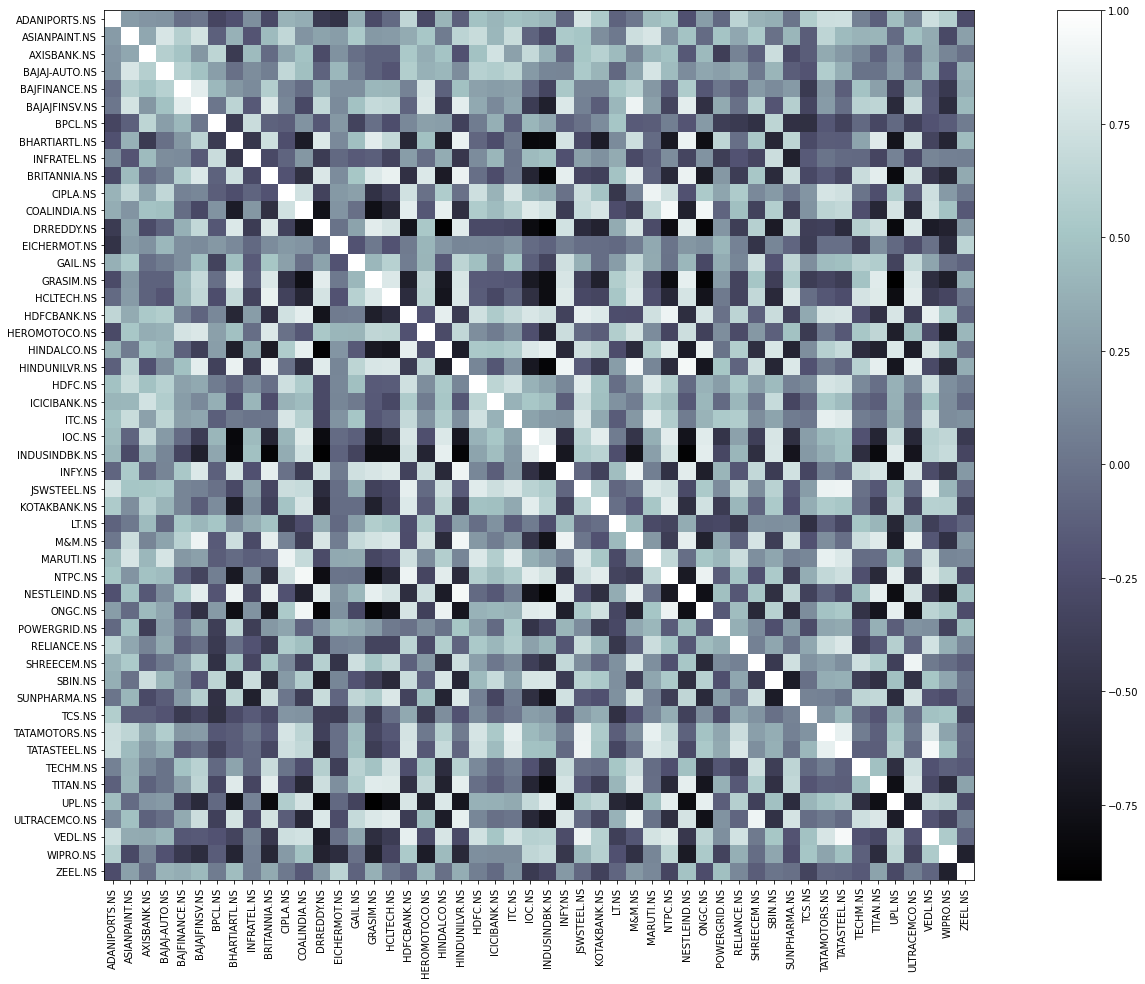

In [50]:
plot_heatmap(corr_df)


Generating cluster groups

In [47]:
cluster_labels = cluster_corelation_matrix(corr_df, symbols)
clusters = create_groups(cluster_labels)
clusters

[['EICHERMOT.NS', 'ZEEL.NS'],
 ['POWERGRID.NS'],
 ['LT.NS'],
 ['TCS.NS'],
 ['AXISBANK.NS', 'BPCL.NS', 'INFRATEL.NS', 'ICICIBANK.NS', 'SBIN.NS'],
 ['ADANIPORTS.NS',
  'ASIANPAINT.NS',
  'BAJAJ-AUTO.NS',
  'CIPLA.NS',
  'HDFC.NS',
  'ITC.NS',
  'JSWSTEEL.NS',
  'MARUTI.NS',
  'RELIANCE.NS',
  'TATAMOTORS.NS',
  'TATASTEEL.NS',
  'VEDL.NS'],
 ['BAJFINANCE.NS',
  'BAJAJFINSV.NS',
  'BHARTIARTL.NS',
  'BRITANNIA.NS',
  'COALINDIA.NS',
  'DRREDDY.NS',
  'GAIL.NS',
  'GRASIM.NS',
  'HCLTECH.NS',
  'HDFCBANK.NS',
  'HEROMOTOCO.NS',
  'HINDALCO.NS',
  'HINDUNILVR.NS',
  'IOC.NS',
  'INDUSINDBK.NS',
  'INFY.NS',
  'KOTAKBANK.NS',
  'M&M.NS',
  'NTPC.NS',
  'NESTLEIND.NS',
  'ONGC.NS',
  'SHREECEM.NS',
  'SUNPHARMA.NS',
  'TECHM.NS',
  'TITAN.NS',
  'UPL.NS',
  'ULTRACEMCO.NS',
  'WIPRO.NS']]

Plotting clusters

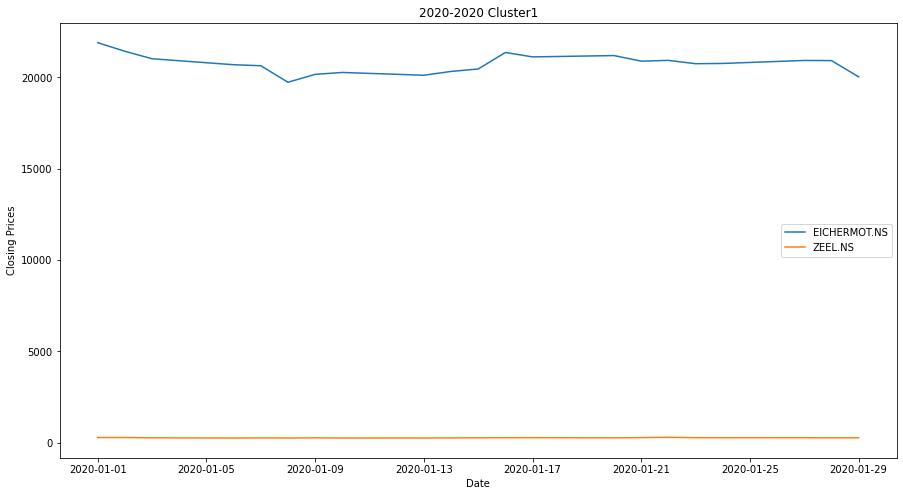

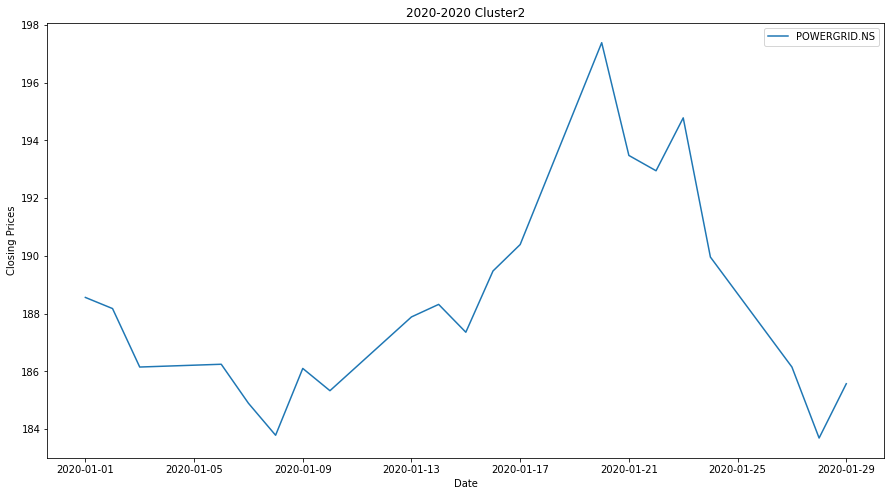

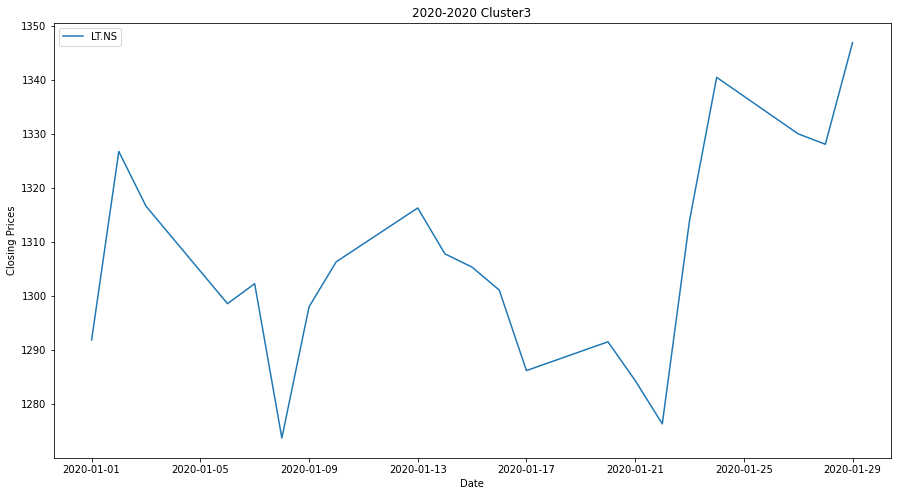

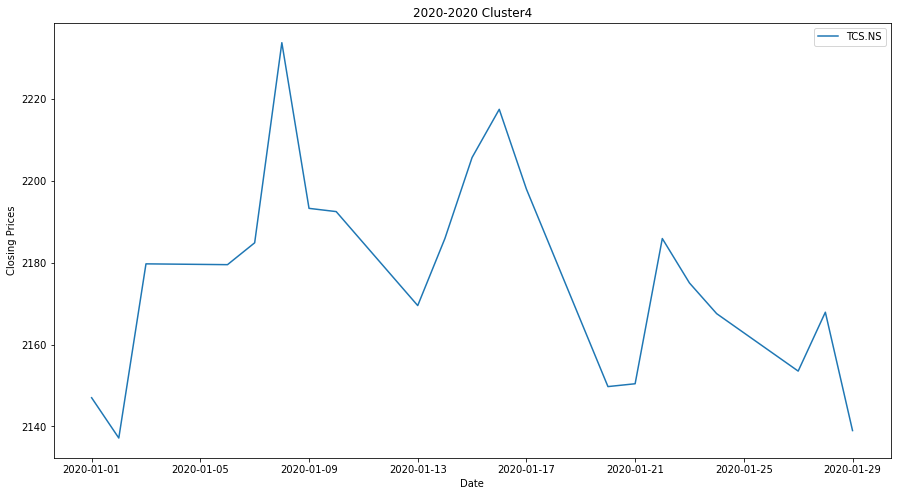

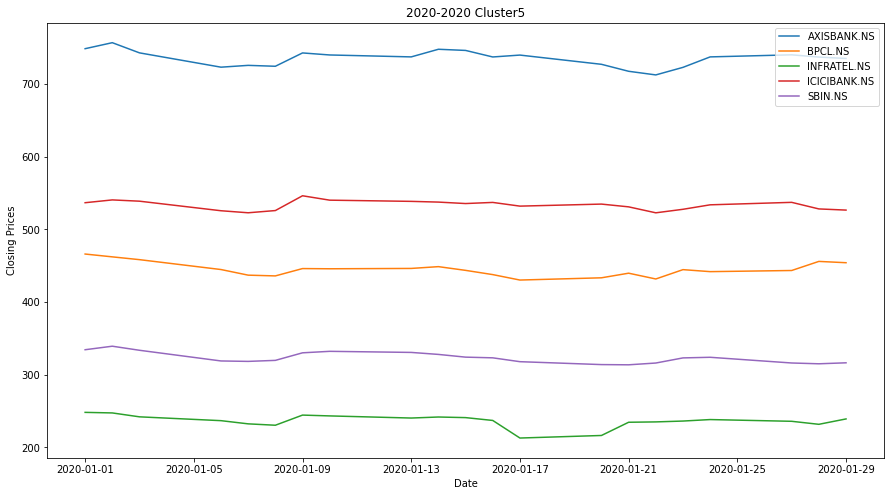

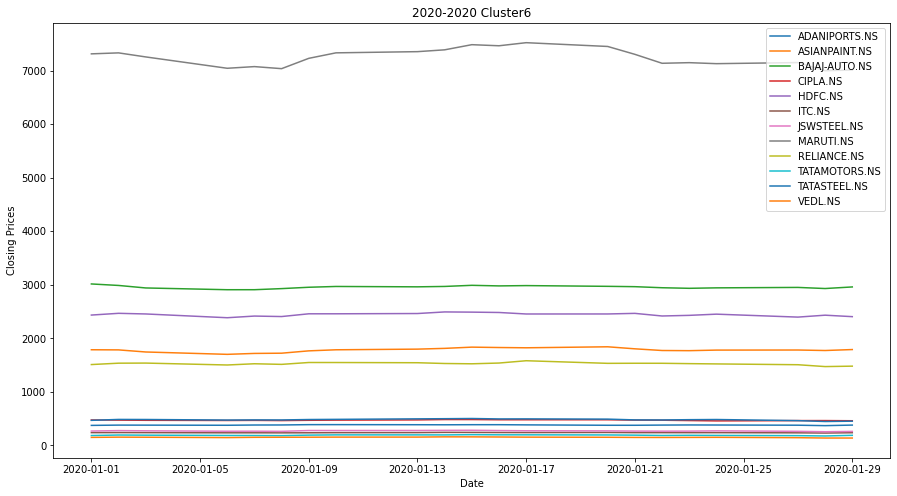

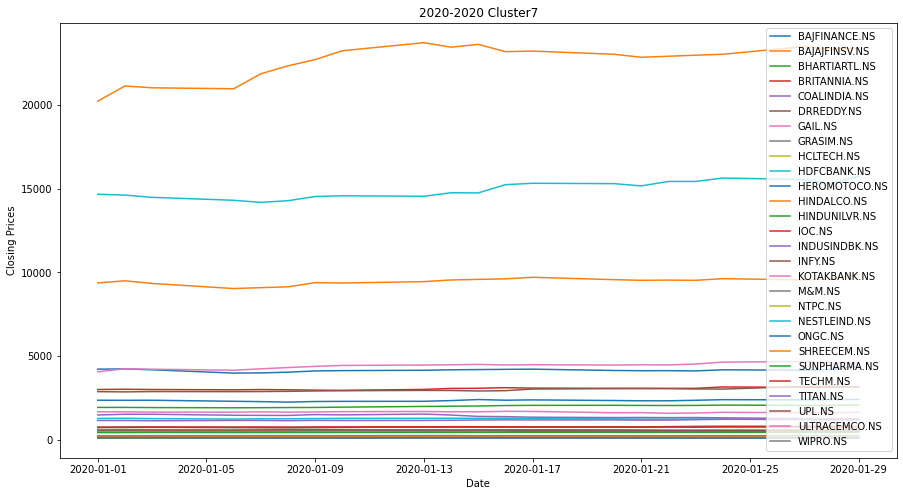

In [48]:
plot_similar_clusters(clusters, df, duration)